In [21]:
import pandas as pd
#pd.set_option(‘display.max_columns’, None)

import numpy as np
from fbprophet import Prophet

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Load your Chicago Crime Table
crime = pd.read_csv('_ChicagoCrimeTempMerged(sample).csv')
# Gimme all the crime types in an array
unique_crimes = crime['Primary Type'].unique()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 24.
C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

IN

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\fbprophet\plot.py:65: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\fbprophet\plot.py:144: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.p

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.
C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\fbprophet\plot.py:65: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Jonas\Anaconda3\envs\class\lib\site-packages\fbprophet\plot.py:144: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling

ValueError: Dataframe has less than 2 non-NaN rows.

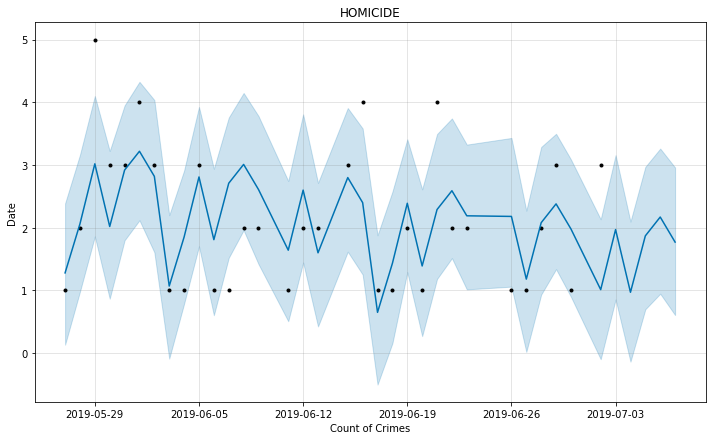

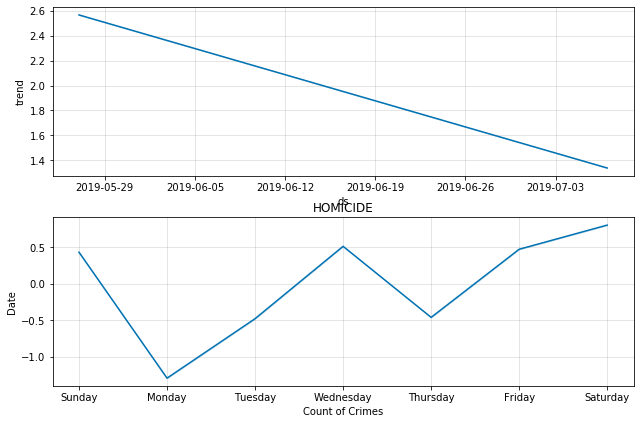

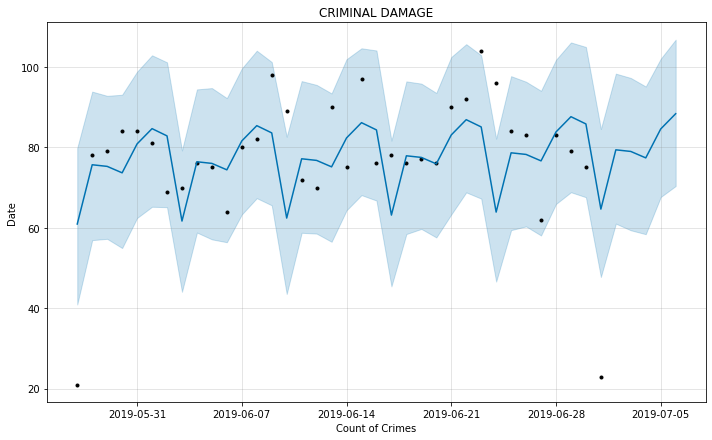

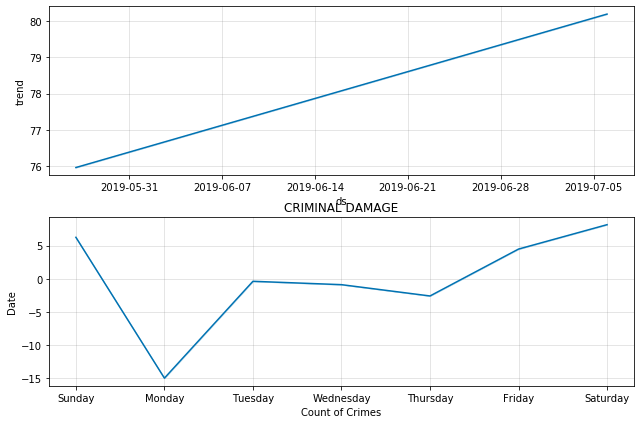

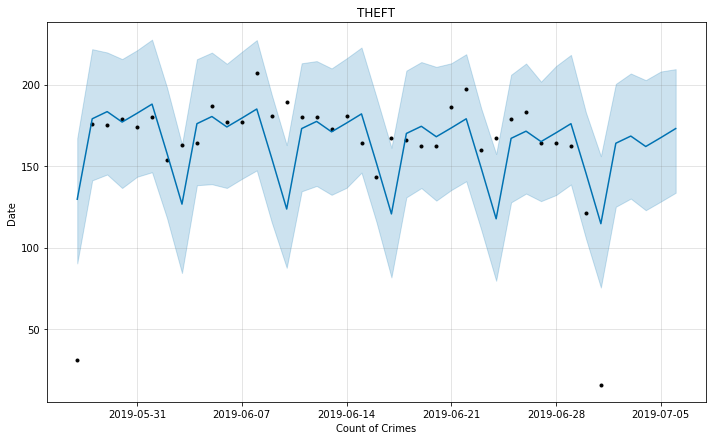

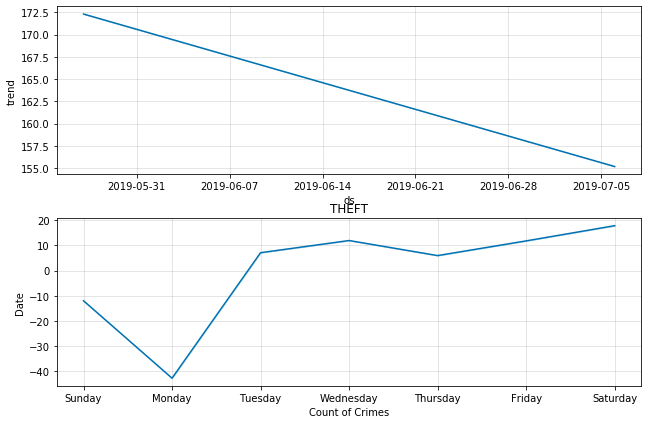

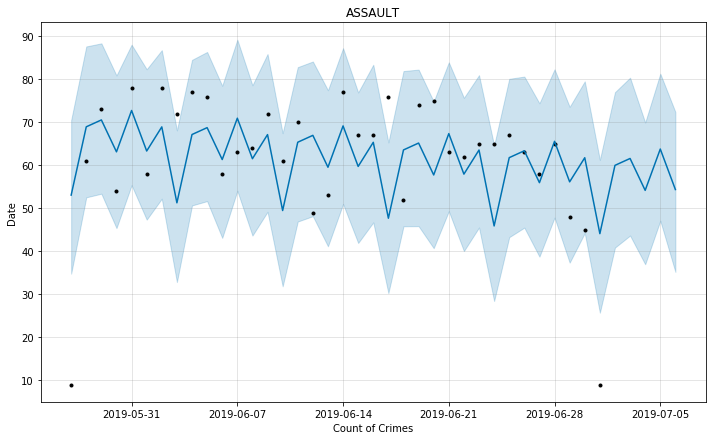

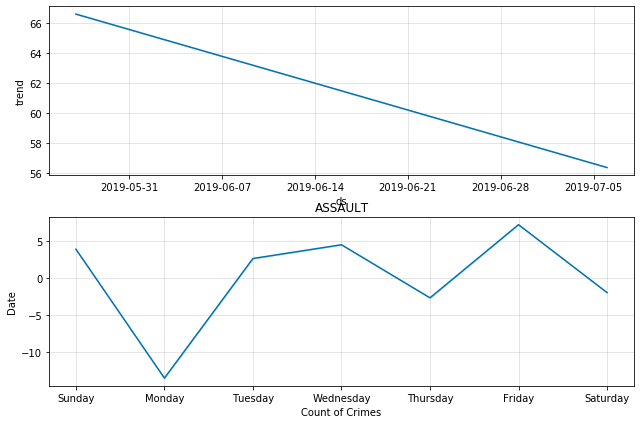

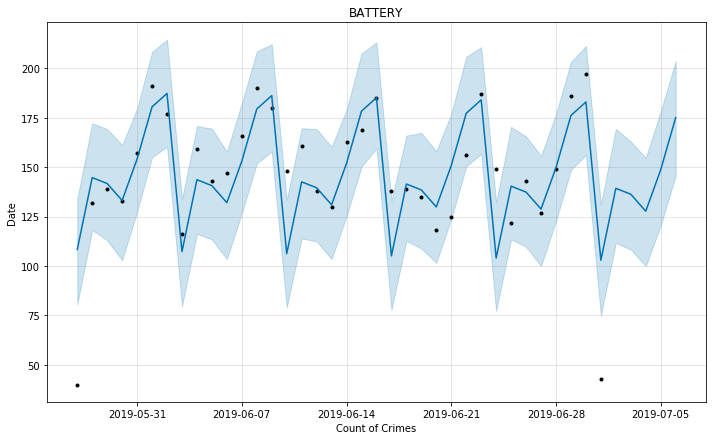

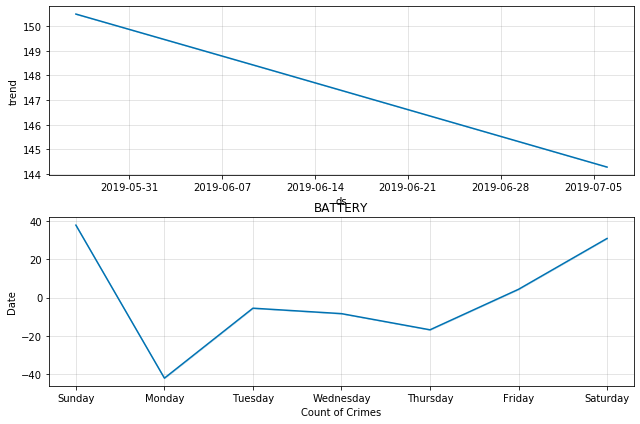

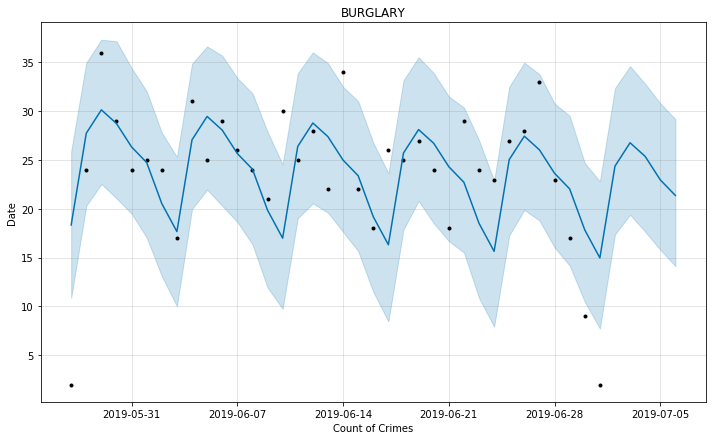

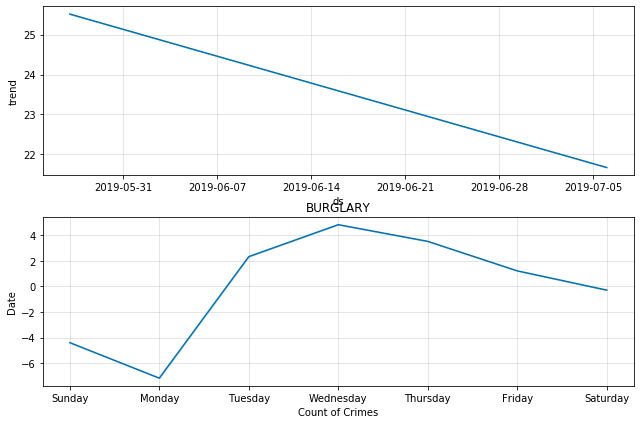

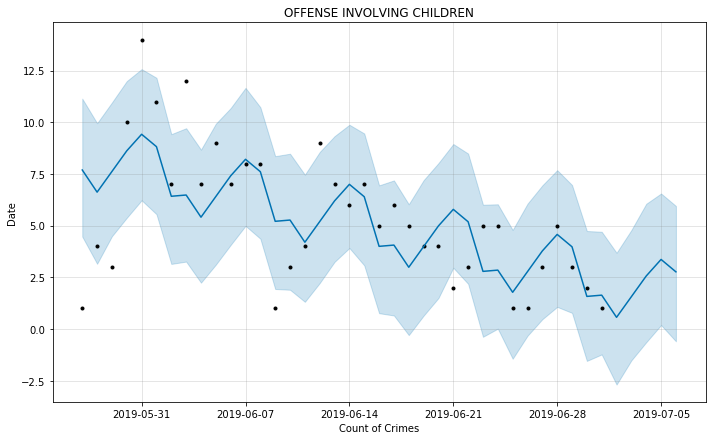

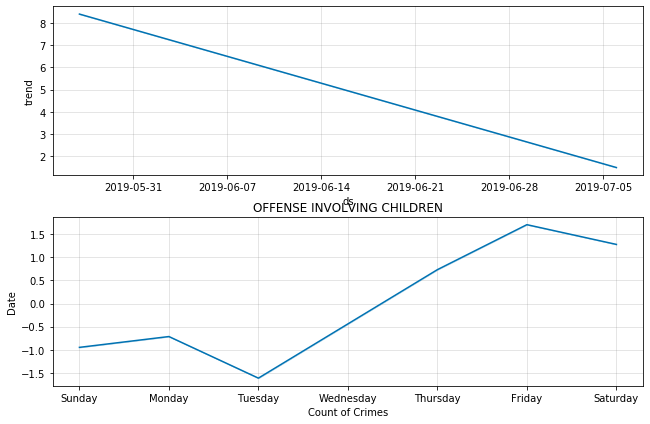

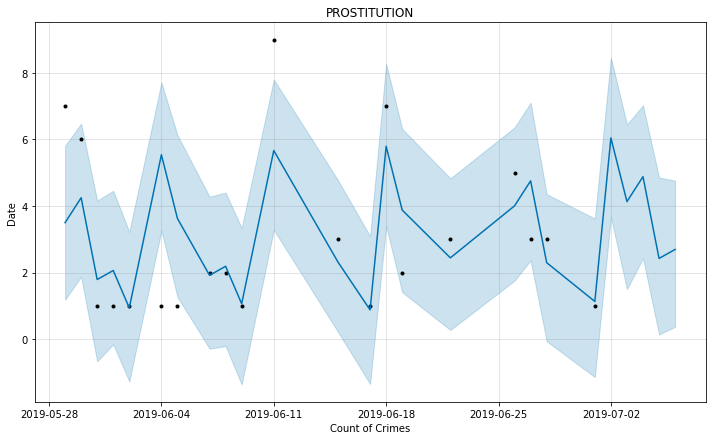

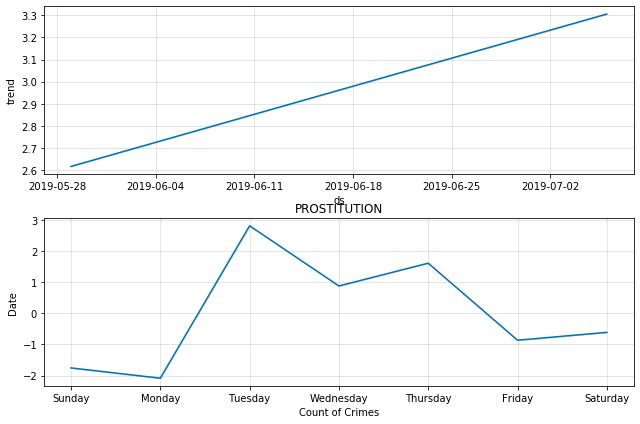

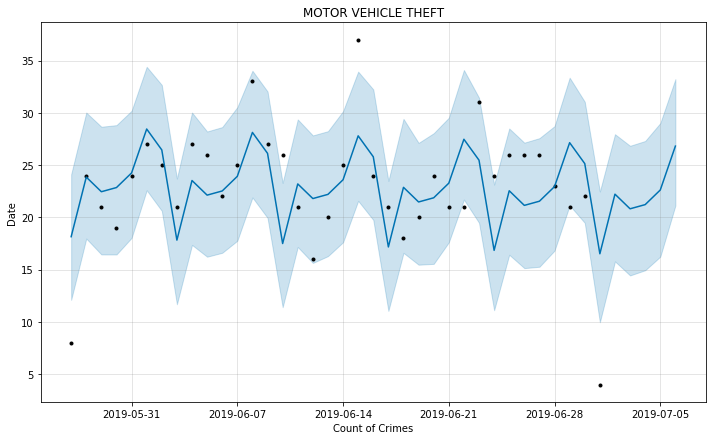

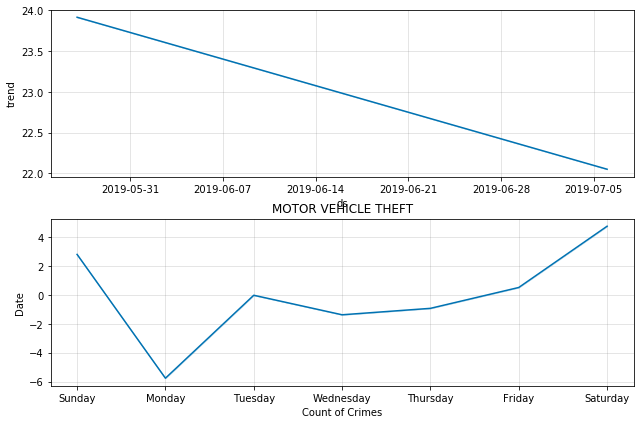

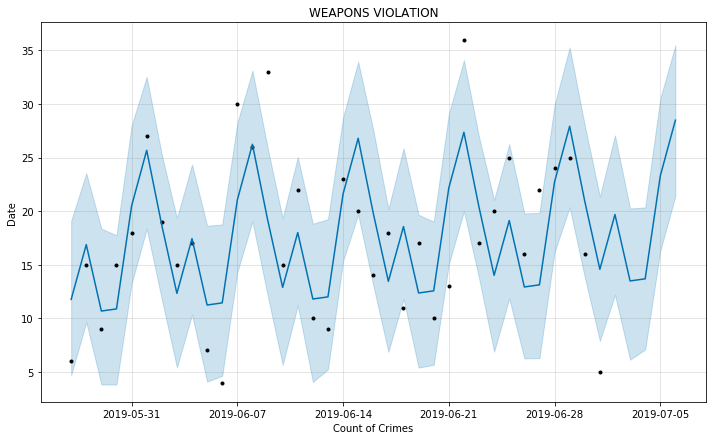

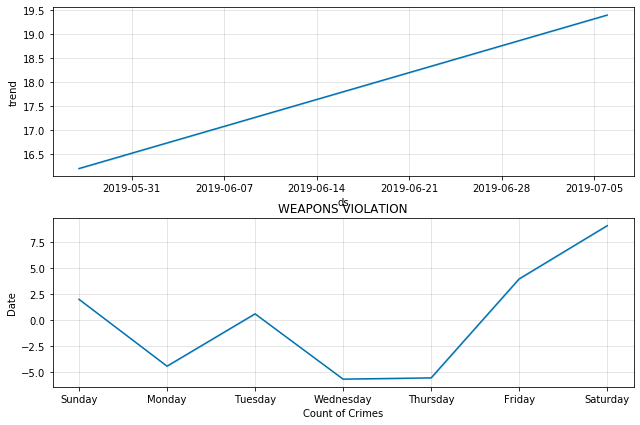

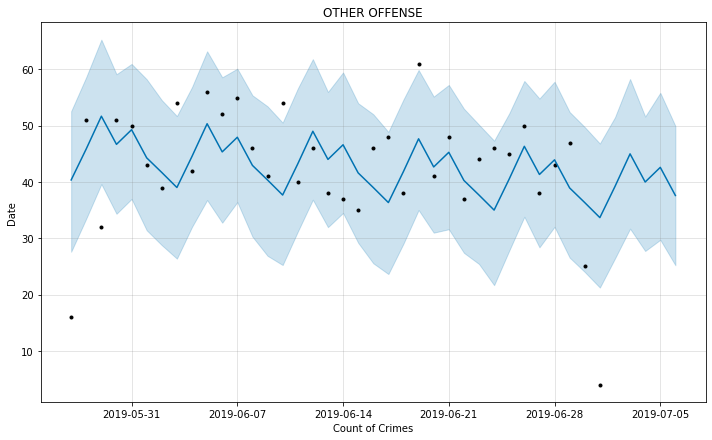

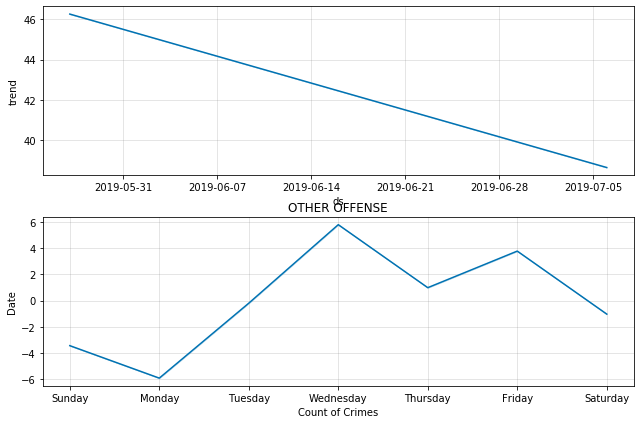

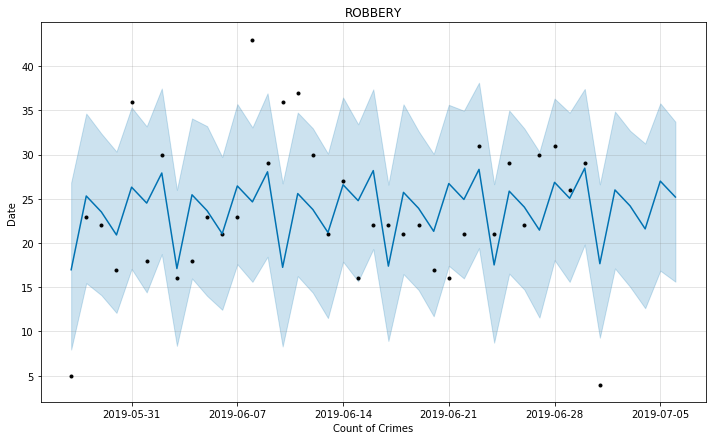

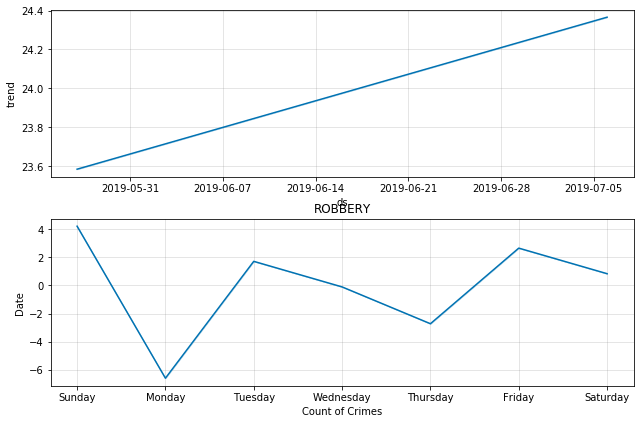

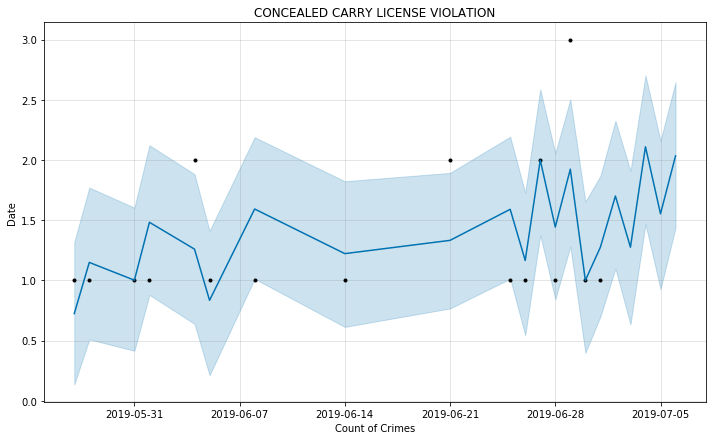

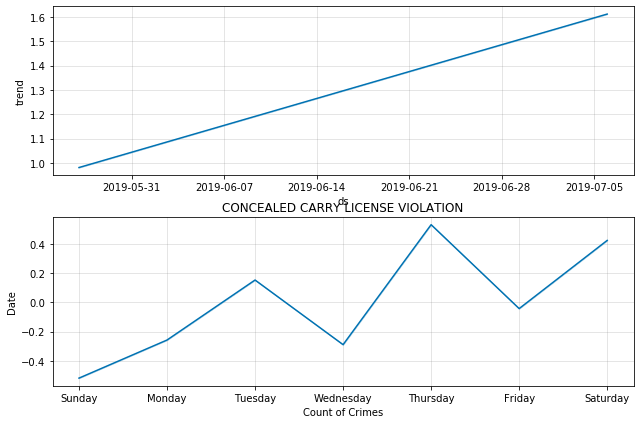

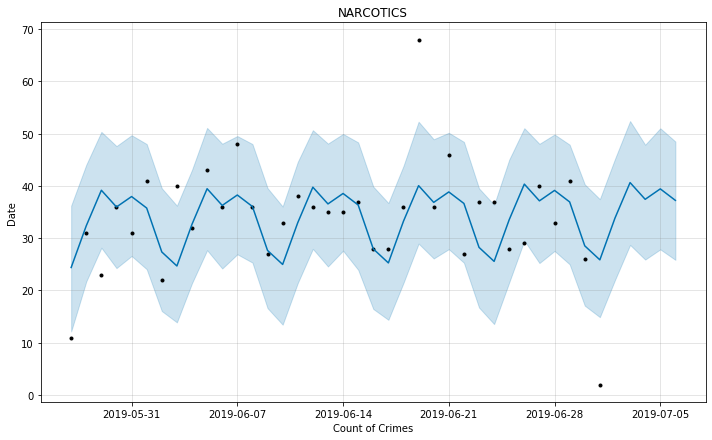

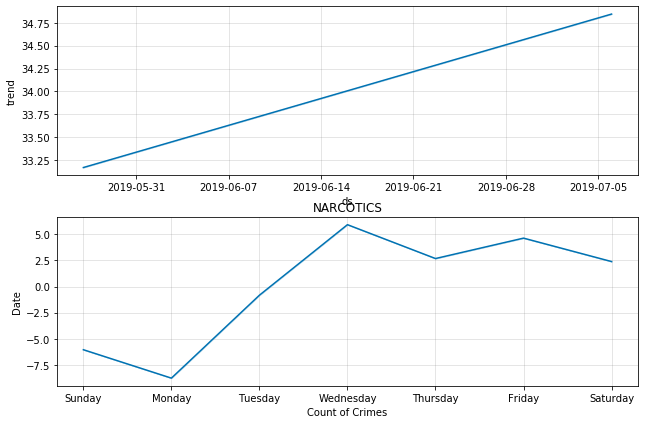

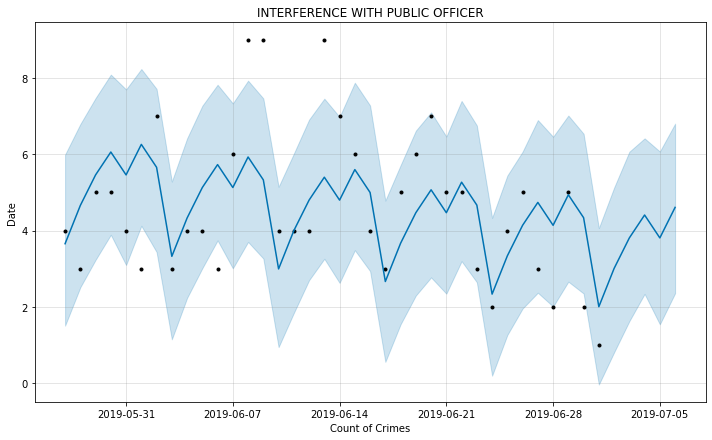

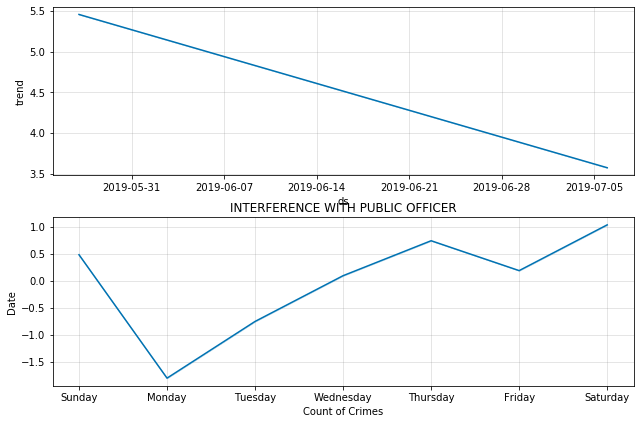

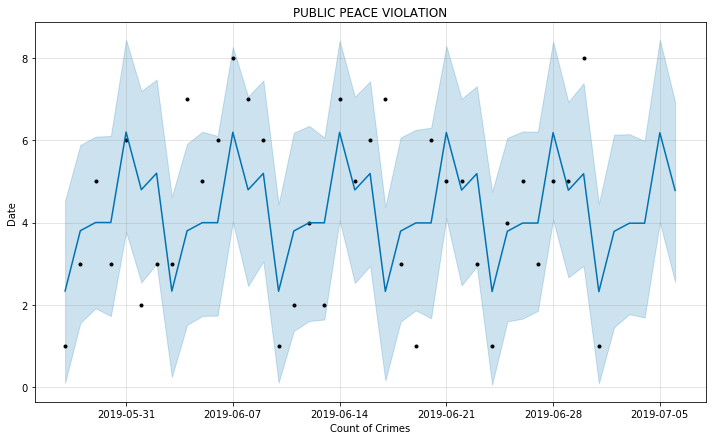

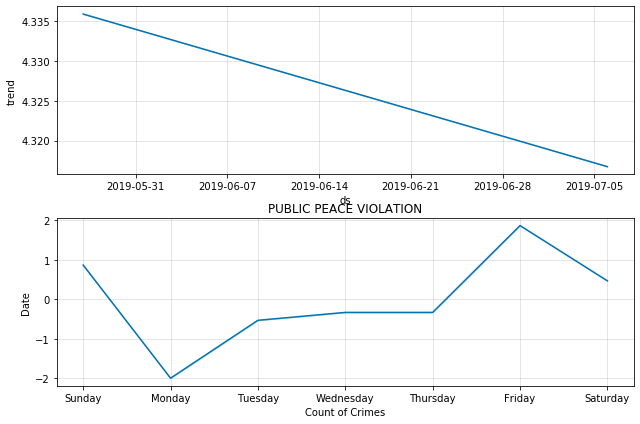

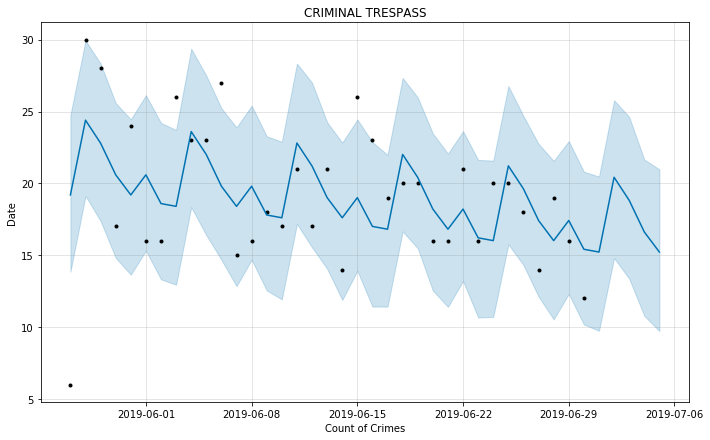

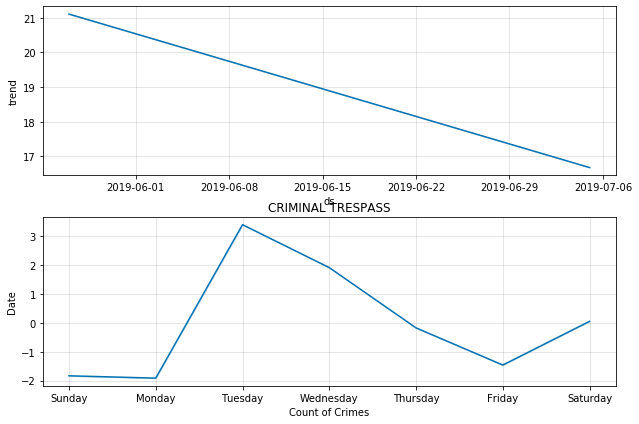

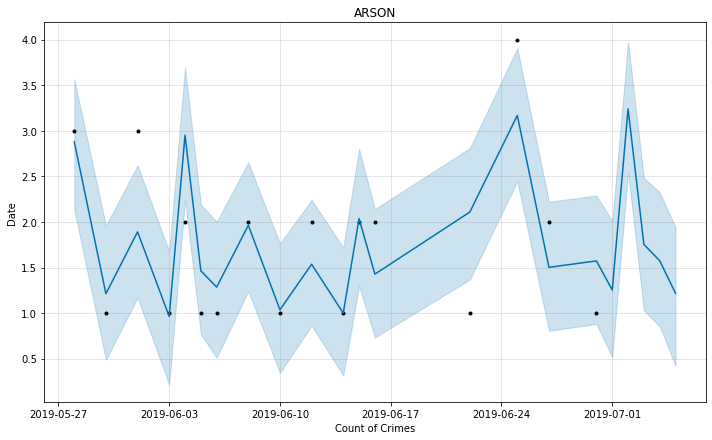

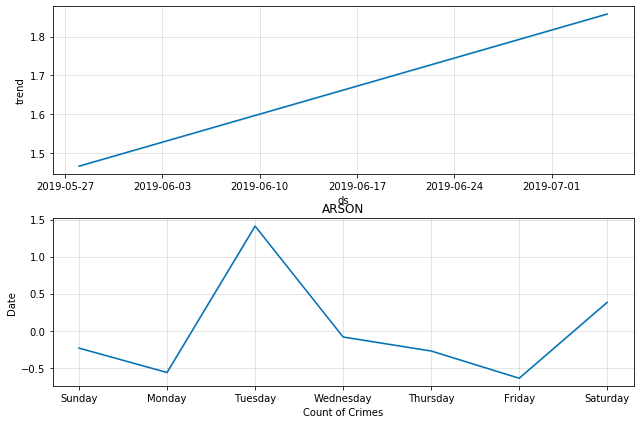

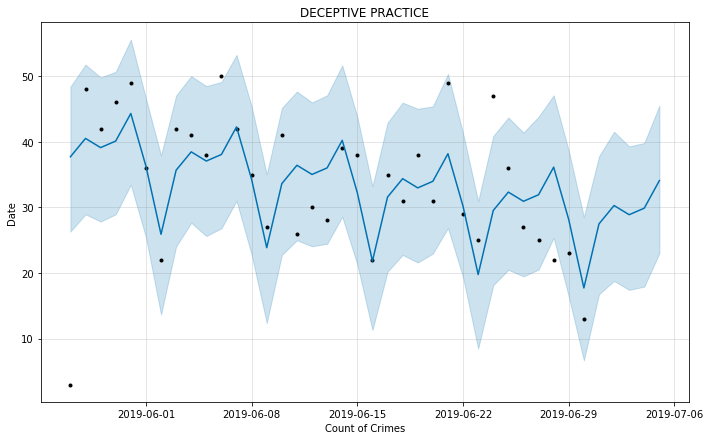

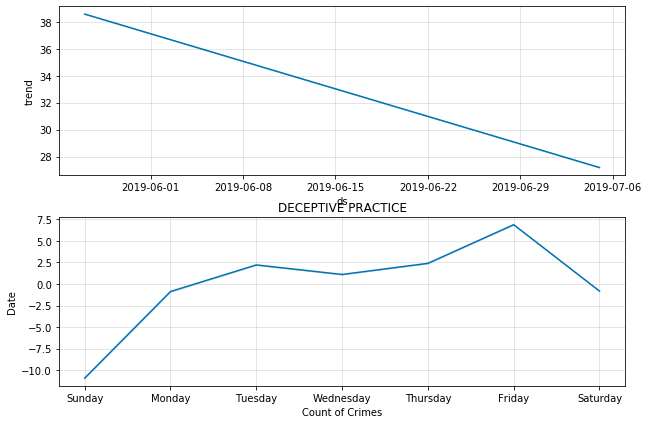

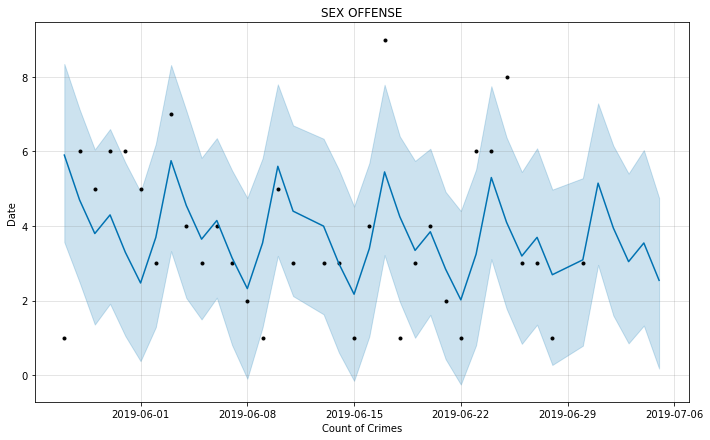

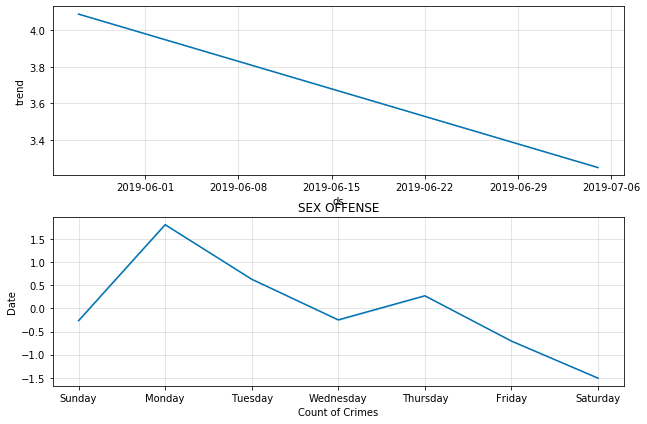

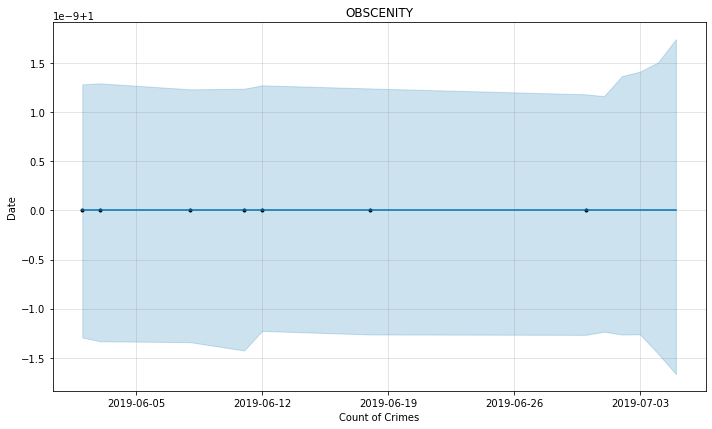

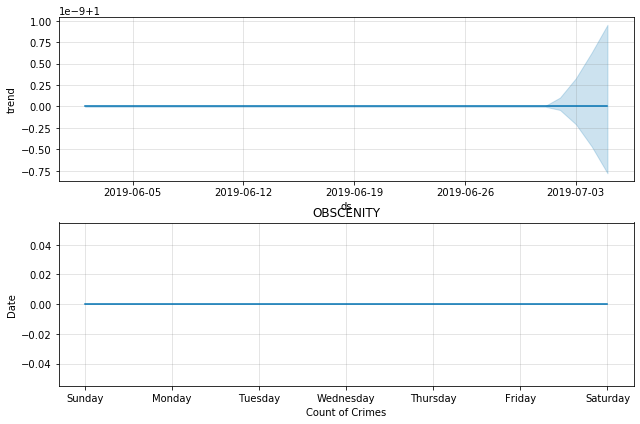

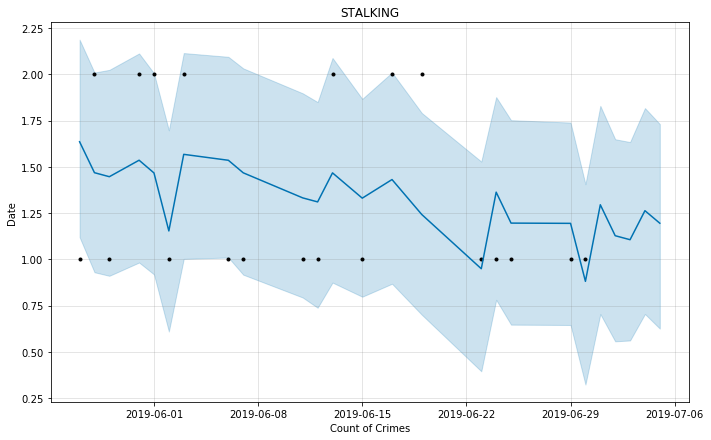

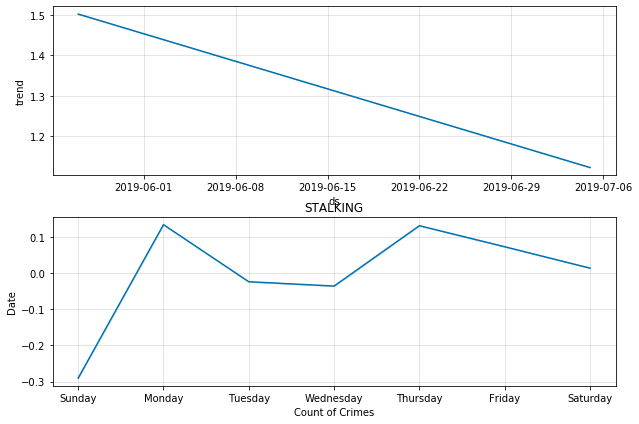

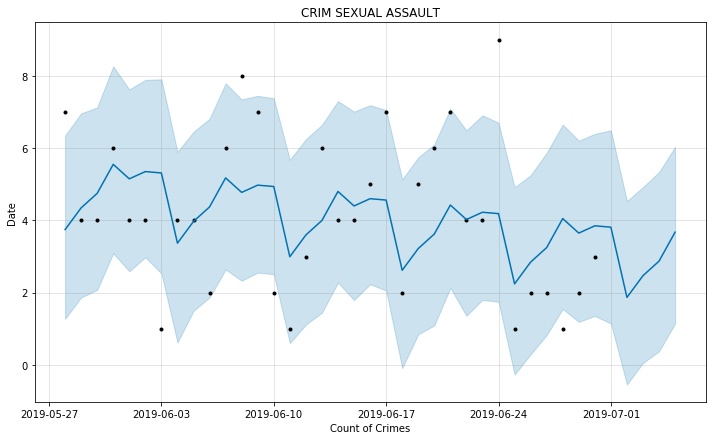

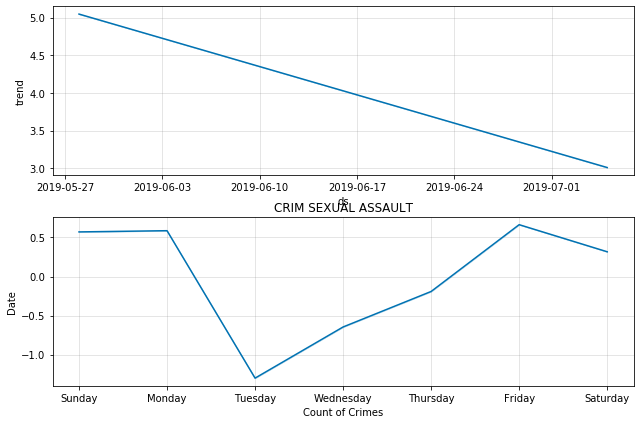

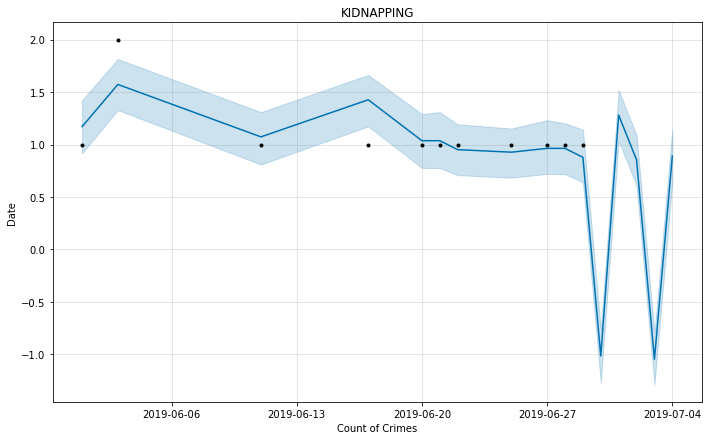

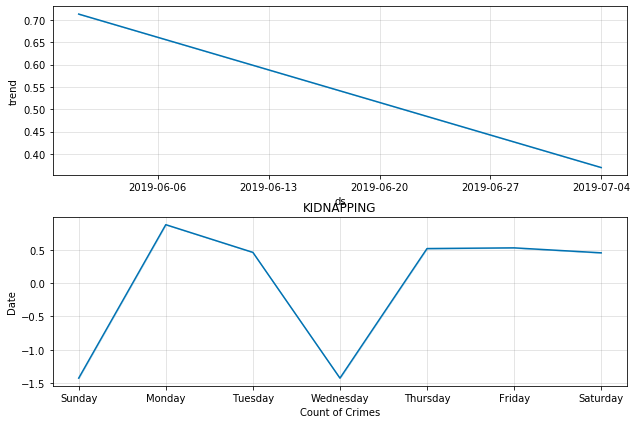

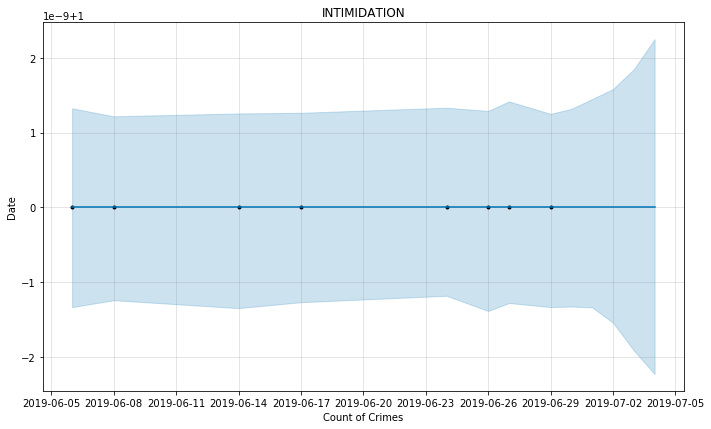

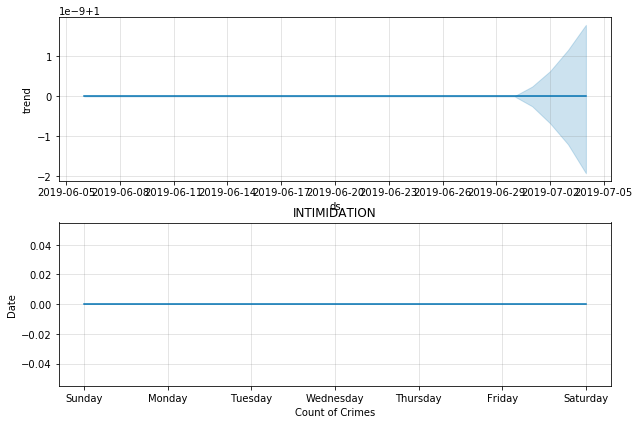

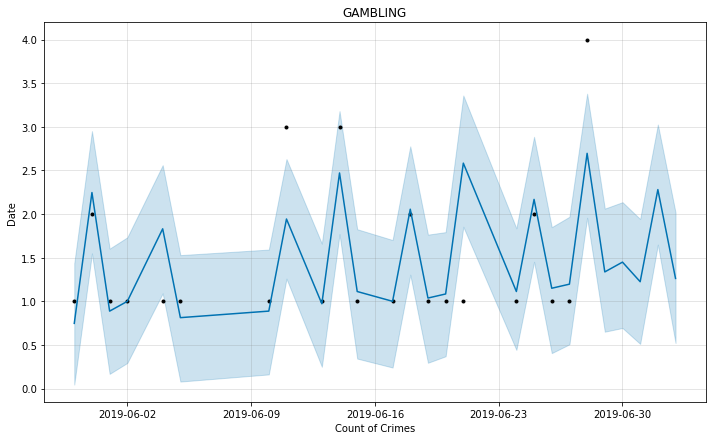

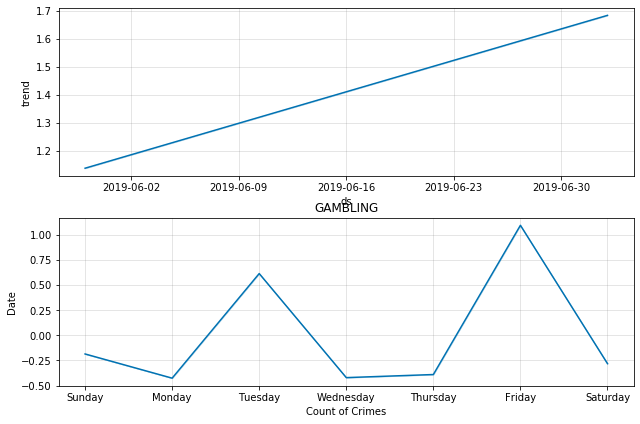

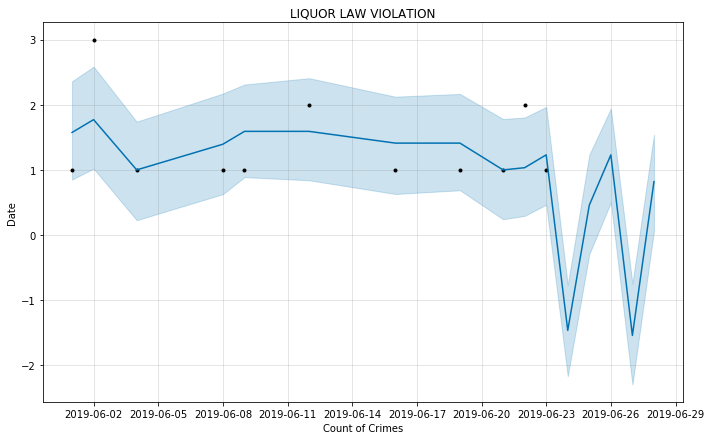

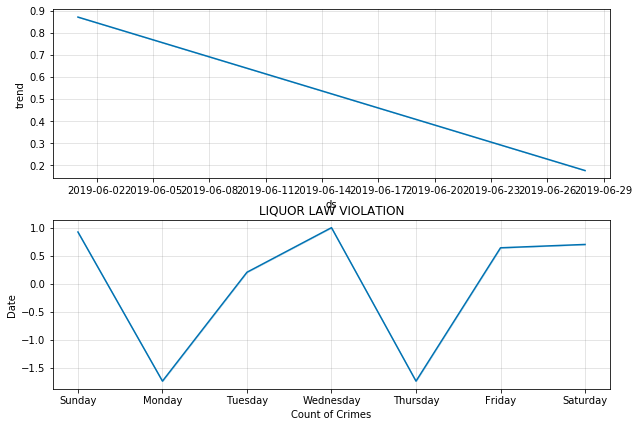

In [24]:
#Create them Charts and forecasts
for x in unique_crimes:
    #pick category
    cat = x
    crime_short = crime[['Primary Type','date']]
    crime_short.head()
    #groupby and counts
    crime_type =  crime_short['Primary Type']==cat
    Homicide = crime_short[crime_type]
    # Homicide.columns = ['dt', 'y']
    Homicide = Homicide.groupby(['date']).count()
    # Homicide.columns = ['dt', 'y']
    Homicide.to_csv('temp.csv')
    homicide2= pd.read_csv('temp.csv')
    homicide2.columns= ['ds','y']
    m=Prophet()
    m.fit(homicide2)
    future =m.make_future_dataframe(periods=5)
    homicide2
    #predict
    forecast= m.predict(future)
    forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
    #plot the forecast
    fig1 = m.plot(forecast)
    plt.title(cat)
    plt.xlabel('Count of Crimes')
    plt.ylabel('Date')
    plt.savefig(cat+ '_forecast'+'.png')
    
    #fig1.title('The title with font size: 20, and font:monospace')
    #plot showing days of the week as compenents
    fig2=m.plot_components(forecast)
    plt.title(cat)
    plt.xlabel('Count of Crimes')
    plt.ylabel('Date')
    plt.savefig(cat+ '.png')
    